In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpmig
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd 
import random
from keras.preprocessing import image
%matplotlib inline

In [5]:
train_real_dir = os.path.join('D:/GVR Data Solutions/archive (1)/fake')
train_fake_dir = os.path.join('D:/GVR Data Solutions/archive (1)/real')

In [6]:
labels = pd.read_csv("D:/GVR Data Solutions/archive (1)/data.csv")

In [7]:
labels.head()

,images_id,label
0,real_1,real
1,real_10,real
2,real_100,real
3,real_101,real
4,real_102,real


In [8]:
train_real_names = os.listdir(train_real_dir)
print(train_real_names[:10])
train_fake_names = os.listdir(train_fake_dir)
print(train_fake_names[:10])

['fake_1.jpg', 'fake_10.jpg', 'fake_100.jpg', 'fake_101.jpg', 'fake_102.jpg', 'fake_103.jpg', 'fake_104.jpg', 'fake_105.jpg', 'fake_106.jpg', 'fake_107.jpg']
['real_1.jpg', 'real_10.jpg', 'real_100.jpg', 'real_101.jpg', 'real_102.jpg', 'real_103.jpg', 'real_104.jpg', 'real_105.jpg', 'real_106.jpg', 'real_107.jpg']


In [9]:
print('total real images:', len(train_real_names))
print('total fake images:', len(train_fake_names))

total real images: 700
total fake images: 589


# Visualizing Dataset ( Fake and Real )

In [10]:
nrows = 5
ncols = 5
def plot_image(folder, names):
    pic_index = np.random.randint(0, len(names))
    img_path = os.path.join(folder, names[pic_index])
    img = mpmig.imread(img_path)
    plt.axis('Off')
    plt.imshow(img)

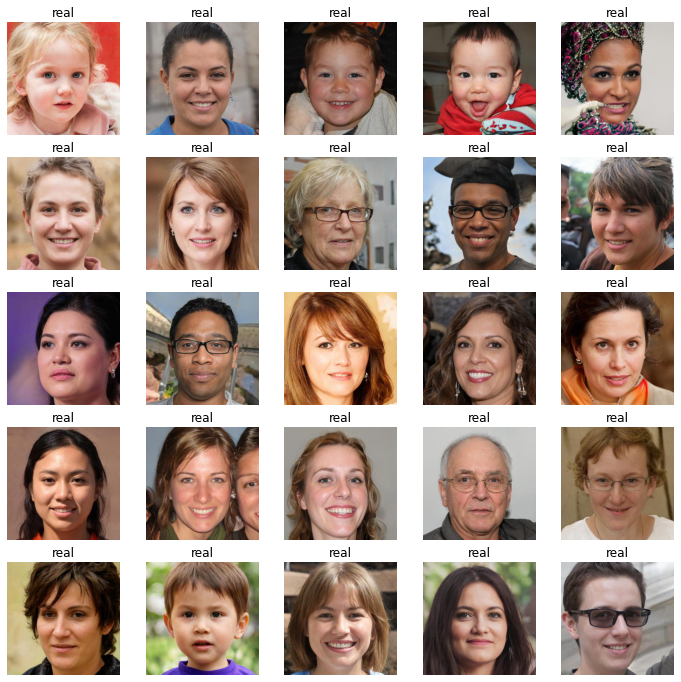

In [11]:
plt.figure(figsize=(12, 12))
for i in range(nrows*ncols):
    ax = plt.subplot(nrows, ncols, i+1)
    plt.title('real')
    plot_image(train_real_dir, train_real_names)

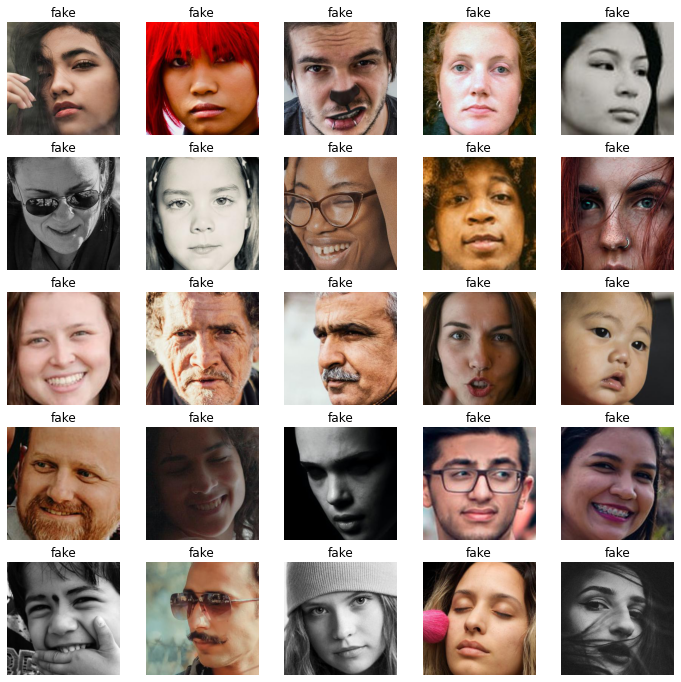

In [12]:
plt.figure(figsize=(12, 12))
for i in range(nrows*ncols):
    ax = plt.subplot(nrows, ncols, i+1)
    plt.title('fake')
    plot_image(train_fake_dir, train_fake_names)

# Defining Model architecture

In [13]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(128, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [14]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [17]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255,
                                  zoom_range=0.1,
                                  rotation_range=20,
                                  width_shift_range=0.2,
                                  height_shift_range=0.2,
                                  horizontal_flip=True)


train_generator = train_datagen.flow_from_directory(
        'D:/GVR Data Solutions/archive (1)', 
        target_size=(300, 300), 
        batch_size=32,
        class_mode='binary')

Found 1289 images belonging to 2 classes.


In [18]:
history = model.fit(
    train_generator, 
    steps_per_epoch=41,
    epochs=100
)

Epoch 1/100
41/41 [==============================] - 116s 3s/step - loss: 0.6512 - accuracy: 0.6005
Epoch 2/100
41/41 [==============================] - 109s 3s/step - loss: 0.4859 - accuracy: 0.7432
Epoch 3/100
41/41 [==============================] - 107s 3s/step - loss: 0.4770 - accuracy: 0.7580
Epoch 4/100
41/41 [==============================] - 107s 3s/step - loss: 0.4817 - accuracy: 0.7898
Epoch 5/100
41/41 [==============================] - 108s 3s/step - loss: 0.4309 - accuracy: 0.8037
Epoch 6/100
41/41 [==============================] - 108s 3s/step - loss: 0.3878 - accuracy: 0.8262
Epoch 7/100
41/41 [==============================] - 106s 3s/step - loss: 0.3360 - accuracy: 0.8549
Epoch 8/100
41/41 [==============================] - 103s 3s/step - loss: 0.3111 - accuracy: 0.8743
Epoch 9/100
41/41 [==============================] - 104s 3s/step - loss: 0.3458 - accuracy: 0.8510
Epoch 10/100
41/41 [==============================] - 106s 3s/step - loss: 0.2810 - accuracy: 0.8782

<AxesSubplot:>

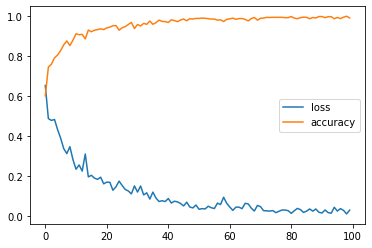

In [19]:
pd.DataFrame(history.history).plot()

In [20]:
model.save("D:/GVR Data Solutions/archive (1)/final_model")

INFO:tensorflow:Assets written to: D:/GVR Data Solutions/archive (1)/final_model\assets
